# Tracer Boundary Indexing

* A notebook of where to set the tracer boundary

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [4]:
coordinate_name=glob.glob('_data/NEMO/ORCA2_INPUT/coordinates*.nc')
print("found file: \n{}".format(coordinate_name))
coordinate_obj=nc.Dataset(coordinate_name[0])

found file: 
['_data/NEMO/ORCA2_INPUT\\coordinates.nc']


In [5]:
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

In [6]:
field = np.zeros(nav_lon.shape)
BSlon=np.arange(-175, -161, 2); BSlat=67*np.ones(BSlon.shape)
x_BS, y_BS = Nts.nearest_search(nav_lon, nav_lat, BSlon, BSlat)
x_BS = 123*np.ones(x_BS.shape).astype(int)
BFlon=np.arange(-69, -53, 2); BFlat=67*np.ones(BFlon.shape)
x_BF, y_BF = Nts.nearest_search(nav_lon, nav_lat, BFlon, BFlat)
x_BF = 123*np.ones(x_BF.shape).astype(int)
FSlon=np.arange(-35, 15, 2); FSlat=67*np.ones(FSlon.shape)
x_FS, y_FS = Nts.nearest_search(nav_lon, nav_lat, FSlon, FSlat)
x_FS = 123*np.ones(x_FS.shape).astype(int)
field[x_BS, y_BS]=1; field[x_BF, y_BF]=1; field[x_FS, y_FS]=1

In [10]:
print('Bering Strait: [123], {}'.format(y_BS))
print('Bafin Bay:     [123], {}'.format(y_BF))
print('Fram Strait:   [123], {}'.format(y_FS))

Bering Strait: [123], [53 54 55 56 56 57 58]
Bafin Bay:     [123], [111 112 113 114 114 115 116 117]
Fram Strait:   [123], [125 126 126 127 128 129 130 130 131 132 133 133 134 135 136 136 137 138
 139 139 140 141 142 142 143]


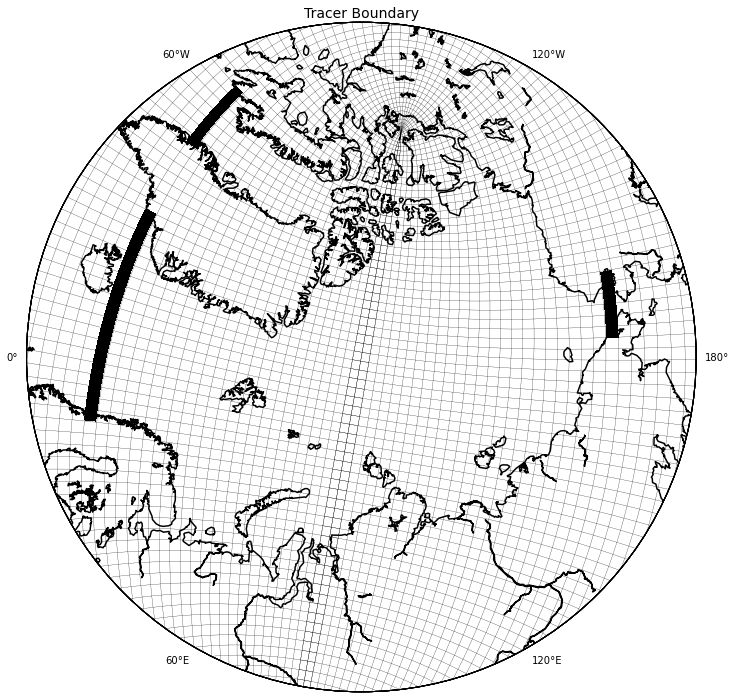

In [11]:
fig=plt.figure(figsize=(12, 12)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
#proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y = proj(nav_lon, nav_lat)
proj.pcolor(x, y, field, cmap=plt.cm.gray_r)
proj.plot(x, y, 'k-', linewidth=0.25);
proj.plot(x.T, y.T, 'k-', linewidth=0.25)
ax.set_title('Tracer Boundary', fontsize=14)

In \*sms\*:
```fortran
! .....
trn(:, :, 1, jpy..) = tracer_boundary
tra(:, :, 1, jpy..) = Ba(:, :)*rnf(:, :)/e3t(:, :, 1)/1000
! ...
```